In [ ]:
# check GPU first
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-e89f8c8a-850f-02be-f446-2000819d5e74)


In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

train =  datasets.MNIST("", train=True, download=True, 
                        transform=transforms.Compose([transforms.ToTensor()]))
test =   datasets.MNIST("", train=False, download=True, 
                        transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module): #繼承nn.Module class
    def __init__(self):
        super().__init__() # 初始化 nn.Module 
        # in_features = 28*28
        # out_features = 64
        self.fc1 = nn.Linear(28*28, 64) 
        # Due to fc1 in_features should be 64
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1)
# 印出我們的模型
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# 試著傳入一筆隨機資料進去模型
X = torch.rand((28, 28)) # random data
X = X.view(-1, 28*28) # reshape data by function view
output = net(X)

In [ ]:
print(output)

tensor([[-2.2560, -2.4000, -2.2704, -2.3134, -2.2808, -2.3654, -2.3568, -2.2158,
         -2.2101, -2.3781]], grad_fn=<LogSoftmaxBackward>)


In [ ]:
# loss and optimizer
import torch.optim as optim # 導入 optimizer function in torch as optim
optimizer = optim.Adam(net.parameters(), lr=1e-3)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # 在這邊data 指的是 每筆資料的特徵值, 以及label (第幾類)
        # 這邊的例子是手寫辨識數字(0~9)
        # 特徵值是 pixels --> array
        # 所以是label是 [0,0,0,0,0,0,0,0] --> 表示0
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        # 計算loss in this case it's one hot vector! 
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.0120, grad_fn=<NllLossBackward>)
tensor(0.2480, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    #print(net.train())
    #print(net.eval())
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]: # 如果X出來最大的機率是y
                correct +=1
            total+=1
print("正確率: ", round(correct/total, 3))            

正確率:  0.978


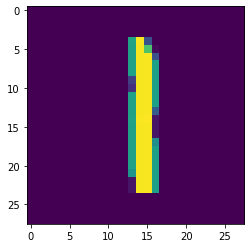

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[5].view(28,28))
plt.show()

In [ ]:
X.view()